# IA DATAHACK: soundcam -> Knn

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Loading the datas
- Loads the centroid.npy and deconvoled_trim.npy from the data folder.
- Change "Folder_name" to change which folder you want to get the datas from.

In [3]:
Folder_name = "Human1"

DATASET_BASE_PATH = "data/LivingRoom_preprocessed_hack"

DATASET_PATH = os.path.join(DATASET_BASE_PATH, Folder_name)

deconvoled = np.load(os.path.join(DATASET_PATH, "deconvoled_trim.npy"))
centroids = np.load(os.path.join(DATASET_PATH, "centroid.npy"))

print(f"Shape of deconvoled = {deconvoled.shape}")
print(f"Shape of centroids = {centroids.shape}")

Shape of deconvoled = (1000, 4, 667200)
Shape of centroids = (1000, 2)


### Important variables
- n_components is the number of components in the input datas after the PCA, optimal value is 100.
- n_test_graph is the number of tests to display on the final plot, to keep it readable, it is preferred to have it around 20.

In [4]:
# Number of components after the PCA
n_components = 100
# Number of tests to display on the final plot
n_test_graph = 20

### Standardization and PCA
- The standardization makes the measures in the input dataset normalized, increasing the performances of the Knn.
- The PCA reduces the number of datas from 667200 to 100 (n_components), making the Knn faster and more accurate.

In [5]:
# Init scaler and PCA
scaler = StandardScaler()
pca = PCA(n_components = n_components)

# Change the shape of the input to allow PCA
reshaped_deconvoled = deconvoled.reshape((deconvoled.shape[0], -1))

# Do PCA
pca_deconvoled = pca.fit_transform(reshaped_deconvoled)

# Scale input
scaled_deconvoled = scaler.fit_transform(pca_deconvoled)

### Knn
- Trains and use the Knn to predict a coordinates pair as an output from a single measure.
- Display a pretty plot to make the results easily readables -> Links the Ground truth to the predicted coordinates (points with same color).


Mean localization error: 553.971 mm (0.554 m)


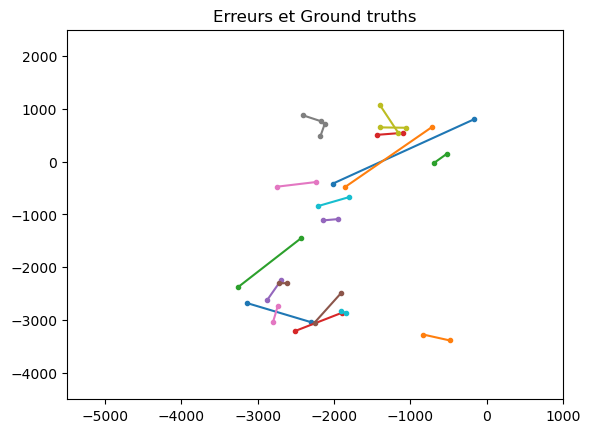

In [21]:
# Split the input and output into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_deconvoled, centroids, test_size=0.2)

# Init the Knn regressor
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_train, y_train)

# Make predictions on test set
y_pred = regressor.predict(X_test)

# Calculate Euclidean distance between predicted and actual coordinates
errors = np.sqrt(np.sum((y_pred - y_test)**2, axis=1))
mean_error = np.mean(errors)
print(f'\nMean localization error: {mean_error:.3f} mm ({(mean_error/1000):.3f} m)')

# Display n distances in a pretty graph
for i in range(n_test_graph):
    plt.plot([y_pred[i][0], y_test[i][0]], [y_pred[i][1], y_test[i][1]], marker = '.')

plt.title("Erreurs et Ground truths")
plt.xlim([-5500, 1000])
plt.ylim([-4500, 2500])
plt.show()
